# Libraries

In [1]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN,KMeans,Birch,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
from utils.Combinations import *
from utils.NetworkDraw import *
pd.set_option('display.max_columns', None)

# Data Cleaning

In [3]:
df = pd.read_csv(r"../data/processed/df1_dummienum.csv")
df.head()

,UserId,UserName,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,PerformanceTier_Cat_Expert,PerformanceTier_Cat_Grandmaster,PerformanceTier_Cat_Master,PerformanceTier_Cat_Novice,Seniority_Cat_0_05,Seniority_Cat_1_2,Seniority_Cat_2_3,Seniority_Cat_3_4,Seniority_Cat_4_mas,Flg_IsIn_Followers_Net_Si,Flg_IsIn_Teams_Net_Si,Flg_IsIn_ParticipantComp_Net_Si,Flg_IsIn_Forums_Net_Si
0,368,antgoldbloom,1.000000,0.149281,1.000000,1.000000,0.379128,0.379128,1.224451e-23,0.000000,0.000000,0.000000,1.000000,1.000000,0.187723,0.025624,0.00000,0.000000,0.0,0.148658,0.0,0.251028,0.740213,0.637735,0.332808,0.327780,1.000000,0.570878,0.159769,0.39312,0.439907,0.542222,1.000000,1.000000,0.267016,1.000000,0.00000,0.0,1,0,0,0,0,0,0,0,1,1,1,0,1
1,381,iguyon,0.017444,0.000000,0.017444,0.015561,0.000000,0.000000,0.000000e+00,0.248961,0.248961,0.003026,0.229757,0.229757,0.008970,0.000442,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.025214,0.381641,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.357802,0.205323,0.268406,0.00000,0.0,1,0,0,0,0,0,0,0,1,1,0,1,1
2,387,nicholasgruen,0.000000,0.000000,0.000000,0.000000,0.379128,0.379128,1.224451e-23,0.000000,0.000000,0.000000,0.025217,0.025217,0.000303,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.025214,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.005326,0.006626,1.000000,0.029823,0.00000,0.0,0,0,0,1,0,0,0,0,1,0,1,0,1
3,389,anandjeyahar,0.005815,0.000000,0.005815,0.006400,0.094782,0.094782,1.517660e-24,0.000000,0.000000,0.000000,0.140096,0.140096,0.005130,0.002651,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007201,0.000000,0.000000,0.00000,0.000000,0.000000,0.063910,0.006626,0.083333,0.506989,0.00000,0.0,0,0,0,0,0,0,0,0,1,1,1,0,1
4,392,jmeynet,0.002907,0.000000,0.002907,0.006203,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.037826,0.037826,0.000198,0.010382,0.10504,0.787287,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014402,0.000000,0.000000,0.00000,0.000000,0.000000,0.021303,0.013252,0.500000,0.298229,0.59072,0.8,0,0,1,0,0,0,0,0,1,1,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676082 entries, 0 to 676081
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   UserId                           676082 non-null  int64  
 1   UserName                         676082 non-null  object 
 2   in_degree_followers              676082 non-null  float64
 3   out_degree_followers             676082 non-null  float64
 4   in_degree_cent_followers         676082 non-null  float64
 5   pagerank_cent_followers          676082 non-null  float64
 6   degree_teams                     676082 non-null  float64
 7   degree_cent_teams                676082 non-null  float64
 8   eigenvector_cent_teams           676082 non-null  float64
 9   degree_participant               676082 non-null  float64
 10  degree_cent_participant          676082 non-null  float64
 11  eigenvector_cent_participant     676082 non-null  float64
 12  de

In [5]:
df.drop(columns=["UserId","UserName"],inplace=True)
df.head()

,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,PerformanceTier_Cat_Expert,PerformanceTier_Cat_Grandmaster,PerformanceTier_Cat_Master,PerformanceTier_Cat_Novice,Seniority_Cat_0_05,Seniority_Cat_1_2,Seniority_Cat_2_3,Seniority_Cat_3_4,Seniority_Cat_4_mas,Flg_IsIn_Followers_Net_Si,Flg_IsIn_Teams_Net_Si,Flg_IsIn_ParticipantComp_Net_Si,Flg_IsIn_Forums_Net_Si
0,1.000000,0.149281,1.000000,1.000000,0.379128,0.379128,1.224451e-23,0.000000,0.000000,0.000000,1.000000,1.000000,0.187723,0.025624,0.00000,0.000000,0.0,0.148658,0.0,0.251028,0.740213,0.637735,0.332808,0.327780,1.000000,0.570878,0.159769,0.39312,0.439907,0.542222,1.000000,1.000000,0.267016,1.000000,0.00000,0.0,1,0,0,0,0,0,0,0,1,1,1,0,1
1,0.017444,0.000000,0.017444,0.015561,0.000000,0.000000,0.000000e+00,0.248961,0.248961,0.003026,0.229757,0.229757,0.008970,0.000442,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.025214,0.381641,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.357802,0.205323,0.268406,0.00000,0.0,1,0,0,0,0,0,0,0,1,1,0,1,1
2,0.000000,0.000000,0.000000,0.000000,0.379128,0.379128,1.224451e-23,0.000000,0.000000,0.000000,0.025217,0.025217,0.000303,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.025214,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.005326,0.006626,1.000000,0.029823,0.00000,0.0,0,0,0,1,0,0,0,0,1,0,1,0,1
3,0.005815,0.000000,0.005815,0.006400,0.094782,0.094782,1.517660e-24,0.000000,0.000000,0.000000,0.140096,0.140096,0.005130,0.002651,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007201,0.000000,0.000000,0.00000,0.000000,0.000000,0.063910,0.006626,0.083333,0.506989,0.00000,0.0,0,0,0,0,0,0,0,0,1,1,1,0,1
4,0.002907,0.000000,0.002907,0.006203,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.037826,0.037826,0.000198,0.010382,0.10504,0.787287,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014402,0.000000,0.000000,0.00000,0.000000,0.000000,0.021303,0.013252,0.500000,0.298229,0.59072,0.8,0,0,1,0,0,0,0,0,1,1,0,0,1


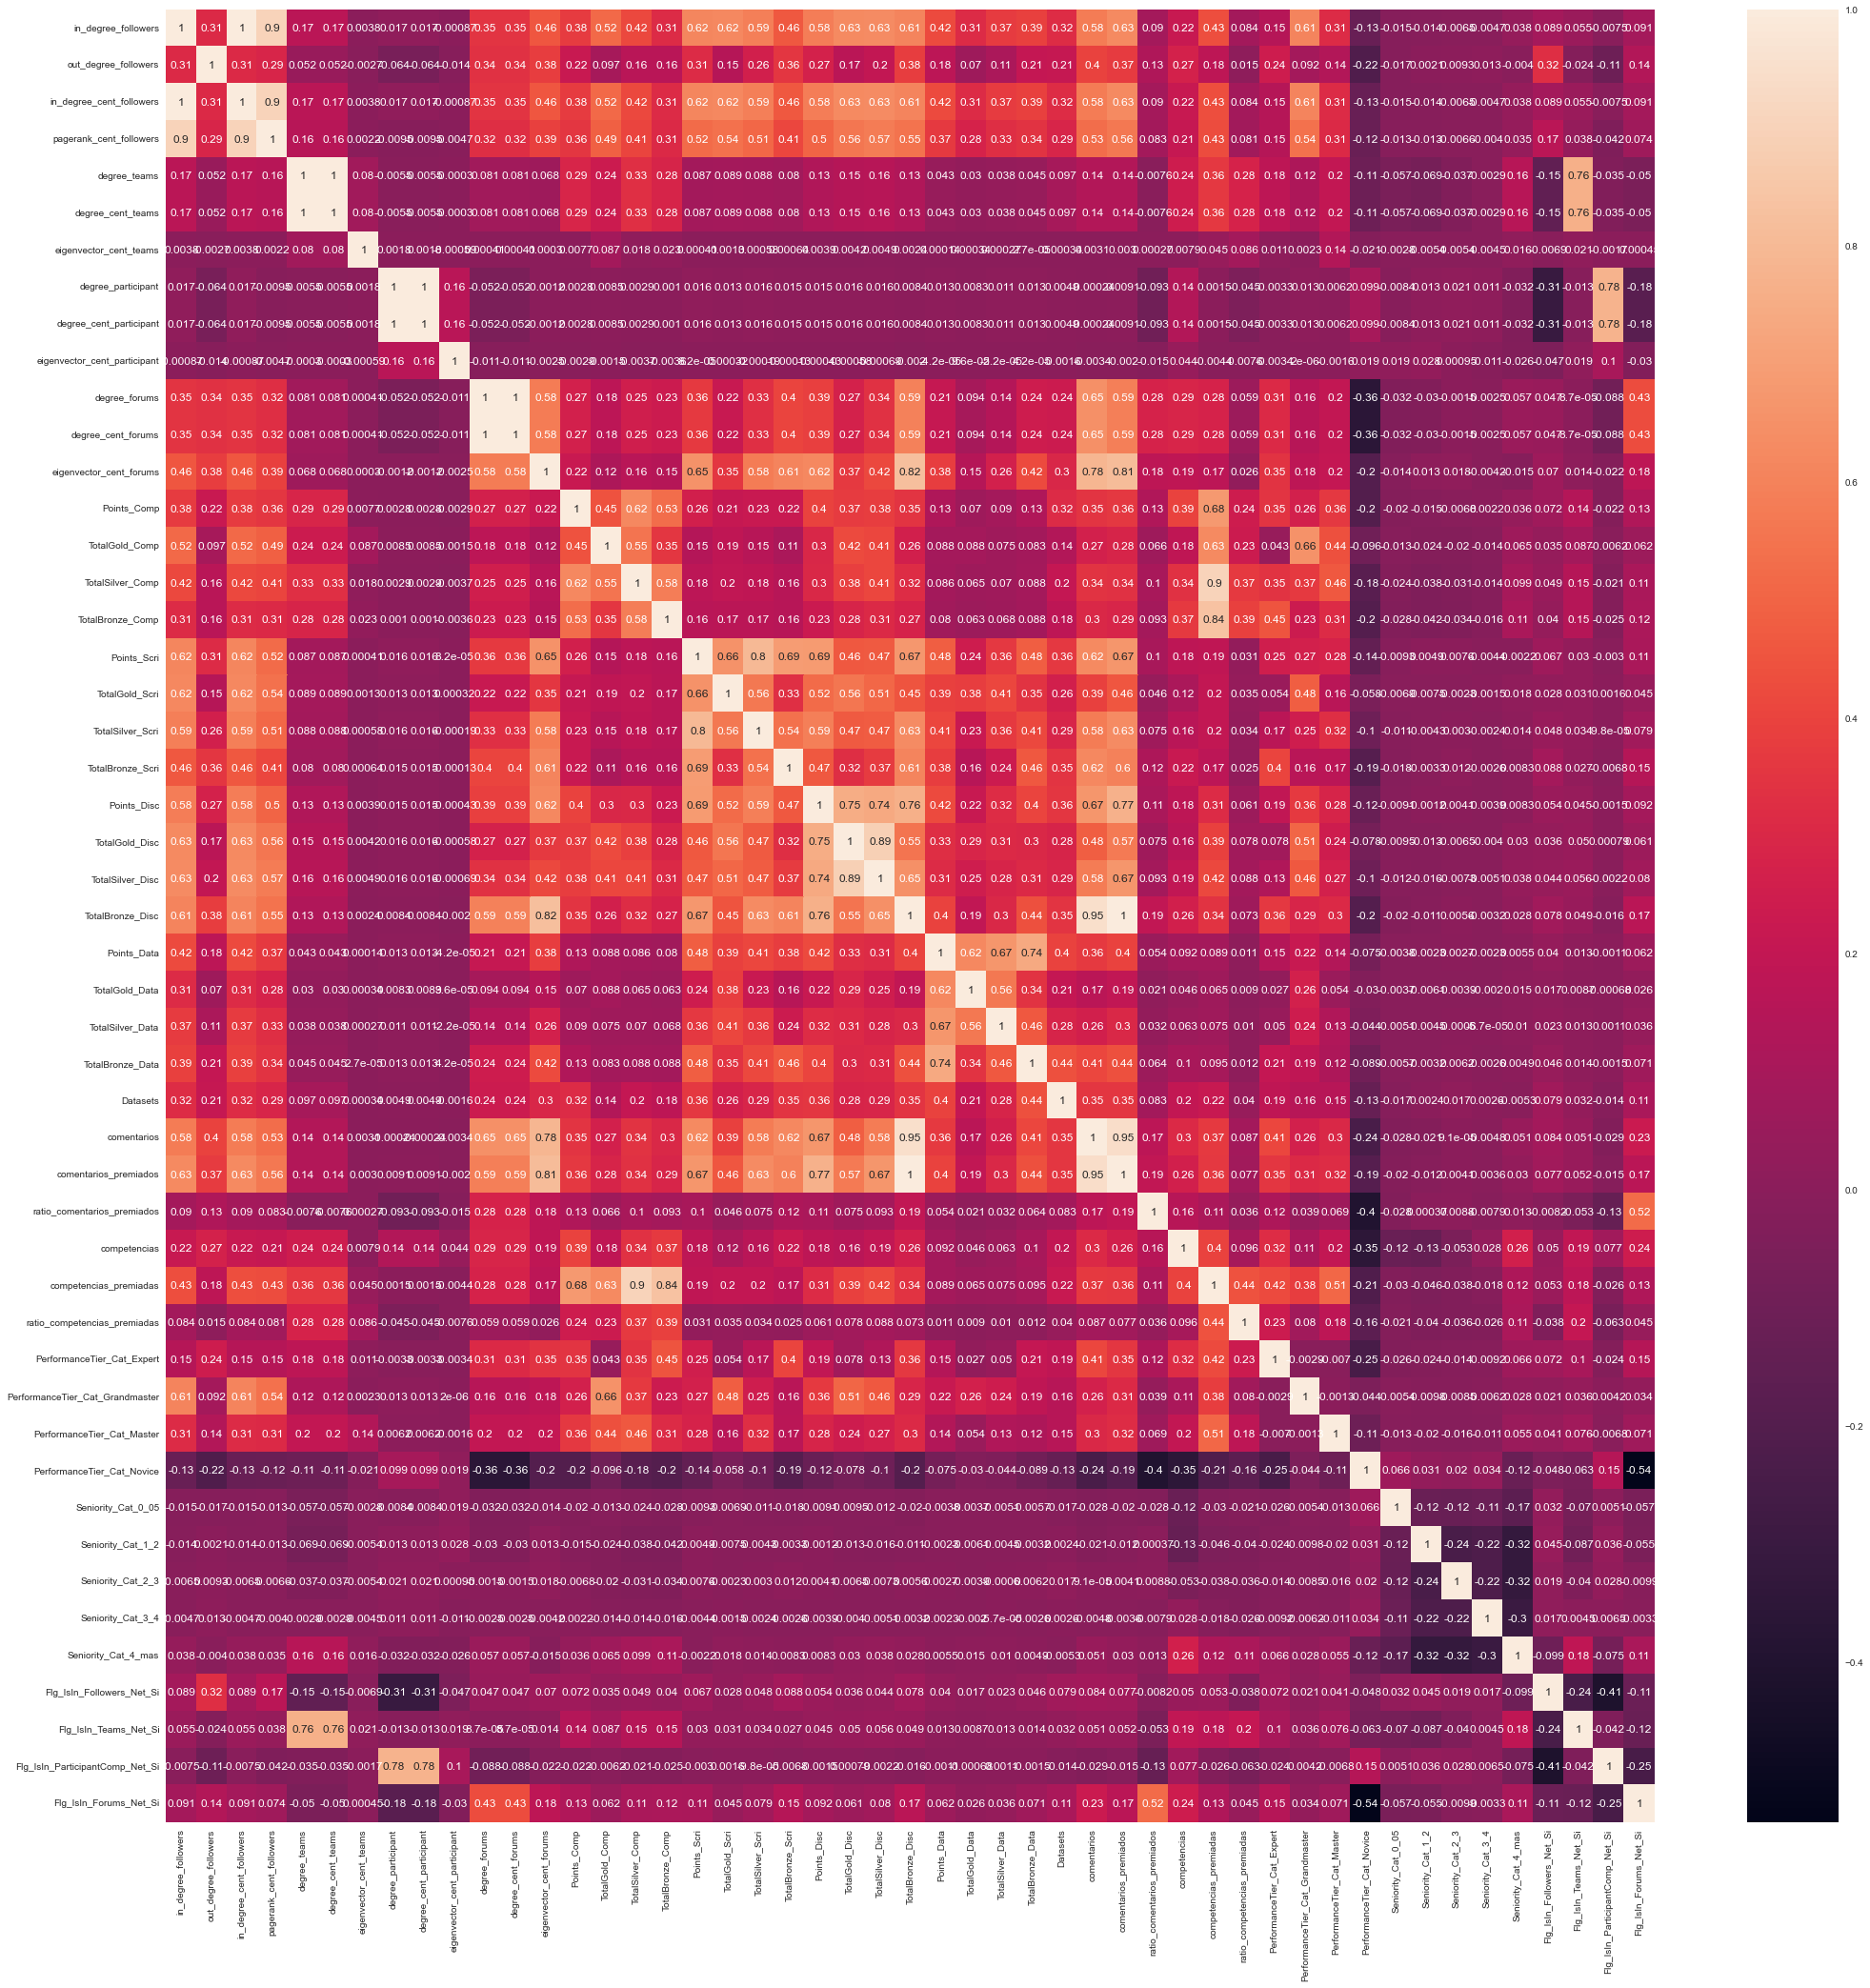

In [7]:
corrMatrix = df.corr()
plt.figure(figsize=[35,35])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
df.shape

(676082, 49)

# PCA

[0.18968592 0.1730741  0.13227095 0.10031237 0.09417355 0.08892612
 0.06482752 0.03634277 0.0329358  0.02398949]
La cantidad de PC que explican el 95 % de varianza: 10


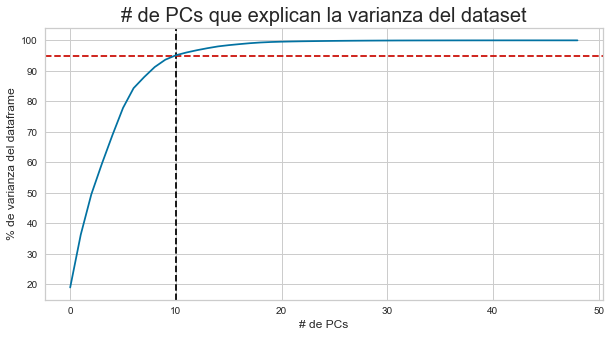

In [9]:
pca = PCA()
pca.fit(df)

#imprimir los valores de varianza de los 10 primeros PC
print(pca.explained_variance_ratio_[:10])

#acumular varianzas
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

#cuantas PC explican el 80% del dataset
k = np.argmax(var_cumu>95)
print("La cantidad de PC que explican el 95 % de varianza:",k)

plt.figure(figsize=[10,5])
plt.ylabel("% de varianza del dataframe", size=12)
plt.xlabel("# de PCs", size=12)
plt.title("# de PCs que explican la varianza del dataset", size=20)
plt.axvline(x=k, color='black', linestyle='--')
plt.axhline(y=95, color='r', linestyle='--')
ax = plt.plot(var_cumu)

In [10]:
print(pca.n_components_)

49


In [11]:
df_aux = pd.DataFrame(data = pca.components_,columns= df.columns)
df_aux.shape

(49, 49)

In [12]:
df_aux.head()

,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,PerformanceTier_Cat_Expert,PerformanceTier_Cat_Grandmaster,PerformanceTier_Cat_Master,PerformanceTier_Cat_Novice,Seniority_Cat_0_05,Seniority_Cat_1_2,Seniority_Cat_2_3,Seniority_Cat_3_4,Seniority_Cat_4_mas,Flg_IsIn_Followers_Net_Si,Flg_IsIn_Teams_Net_Si,Flg_IsIn_ParticipantComp_Net_Si,Flg_IsIn_Forums_Net_Si
0,0.006575,0.033694,0.006575,0.007639,0.017953,0.017953,0.000186,-0.063089,-0.063089,-0.003079,0.077473,0.077473,0.016193,0.019066,0.003589,0.012754,0.015139,0.007240,1.531971e-03,0.004323,0.010942,0.005486,0.002453,0.003706,0.016868,0.002421,0.000454,0.000856,0.002622,0.006922,0.027068,0.016292,0.248041,0.099671,0.017741,0.017178,0.048785,0.002167,0.010860,-0.502318,-0.035700,-0.115689,-0.078466,-0.055688,0.313609,0.092047,0.021448,-0.341725,0.632941
1,-0.000889,-0.035875,-0.000889,-0.004767,0.081005,0.081005,0.000269,0.071731,0.071731,0.002857,-0.001675,-0.001675,-0.003314,0.002011,0.001219,0.004240,0.005350,-0.001462,7.321940e-05,-0.000385,-0.002237,-0.000456,0.000297,0.000342,-0.001376,-0.000491,-0.000006,-0.000079,-0.000558,-0.002069,-0.001251,-0.001119,-0.008864,0.049473,0.006081,0.014655,0.003710,0.000576,0.002415,-0.018365,-0.033088,-0.146064,-0.102708,-0.065056,0.376497,-0.736496,0.351107,0.354044,0.045124
2,-0.000818,-0.007169,-0.000818,-0.003498,-0.068116,-0.068116,-0.000225,0.052465,0.052465,0.002593,0.033952,0.033952,0.008528,-0.001088,-0.001704,-0.004900,-0.005611,0.002483,8.895254e-07,0.000816,0.003522,0.001264,-0.000217,-0.000164,0.004473,0.000666,-0.000038,0.000107,0.000785,0.001905,0.006306,0.004004,0.169968,-0.024873,-0.006914,-0.013616,-0.000866,-0.000665,-0.003414,-0.180668,0.007791,0.191509,0.255451,0.117657,-0.595983,-0.370342,-0.285718,0.281483,0.388790
3,0.001538,0.005236,0.001538,0.001961,0.070822,0.070822,0.000117,-0.023059,-0.023059,-0.001436,0.002390,0.002390,0.001601,0.007459,0.001147,0.004300,0.004440,0.001178,4.137683e-04,0.000920,0.001697,0.001287,0.000710,0.000940,0.002792,0.000353,0.000045,0.000148,0.000460,0.001948,0.003520,0.002763,-0.013398,0.021458,0.005653,0.009603,0.010429,0.000597,0.003040,-0.012474,-0.009731,-0.612441,0.689341,0.094220,-0.152448,0.028290,0.293311,-0.127521,-0.045811
4,0.002860,0.007480,0.002860,0.002985,0.133414,0.133414,0.000252,-0.040477,-0.040477,-0.000480,0.008360,0.008360,0.004263,0.015809,0.002349,0.008994,0.009446,0.002734,7.627259e-04,0.001703,0.002862,0.002665,0.001363,0.001746,0.005271,0.000648,0.000081,0.000264,0.000659,0.002978,0.006540,0.005245,0.015931,0.024728,0.011866,0.019993,0.023000,0.001246,0.006186,-0.096178,-0.016620,0.131340,-0.345365,0.592341,-0.352480,-0.027365,0.541062,-0.207089,-0.028281


In [13]:
pca_t = PCA(n_components=10,random_state=66) #calculamos con 9 pues es el valor que nos da 95%
transf = pca_t.fit_transform(df) #transformamos del original (28) al nuevo de 5 perdiendo un 5%
df_pca = pd.DataFrame(data = transf, columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8','PCA_9','PCA_10'])
df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,1.693011,0.293338,-0.527977,0.208577,0.398425,0.411375,0.986933,-0.134263,0.697513,-0.502130
1,1.005101,0.255154,0.066040,-0.310233,-0.528485,-0.316344,1.173981,-0.095029,0.335651,-0.330252
2,0.872220,0.976469,-0.270664,0.102210,0.241962,0.243936,-0.490235,-0.119794,0.713846,0.576346
3,1.296232,0.243475,-0.581061,0.126028,0.234512,0.283651,0.494989,-0.028419,0.131825,-0.344852
4,1.382682,-0.115396,-0.236044,-0.173762,-0.295679,-0.141719,0.415607,-0.014164,0.011114,0.088237


In [14]:
#Guardamos el PCA
filename = r'../models/pca_model.pkl'
pickle.dump(pca_t, open(filename, 'wb'))

In [15]:
print('Explained variation per principal component: {}'.format(pca_t.explained_variance_ratio_))

Explained variation per principal component: [0.18968592 0.1730741  0.13227095 0.10031237 0.09417355 0.08892612
 0.06482752 0.03634277 0.0329358  0.02398949]


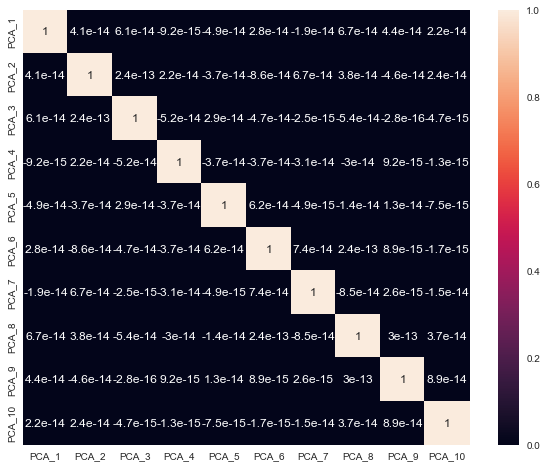

In [17]:
corrMatrix = df_pca.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
df_pca.describe()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
count,6.760820e+05,6.760820e+05,6.760820e+05,6.760820e+05,6.760820e+05,6.760820e+05,6.760820e+05,6.760820e+05,6.760820e+05,6.760820e+05
mean,2.051496e-16,1.970781e-16,1.693745e-16,-3.783496e-18,1.440251e-16,1.856436e-16,-7.516546e-17,-1.990960e-16,-5.555854e-16,2.027113e-16
std,6.053915e-01,5.782755e-01,5.055347e-01,4.402466e-01,4.265630e-01,4.145085e-01,3.539146e-01,2.649890e-01,2.522626e-01,2.152927e-01
min,-9.245617e-01,-7.738042e-01,-1.303322e+00,-8.591488e-01,-7.089880e-01,-9.742277e-01,-7.456360e-01,-4.040608e-01,-7.422298e-01,-7.315480e-01
25%,-3.874284e-01,-6.207092e-01,-2.605882e-01,-2.317741e-01,-4.077601e-01,-2.442508e-01,-1.314862e-01,-1.206503e-01,-8.389008e-02,-5.404555e-02
50%,-2.717399e-01,4.866440e-02,-7.609456e-02,-1.526807e-02,-6.239525e-02,1.252980e-02,-4.465456e-02,-9.263206e-02,-4.825243e-02,2.040557e-02
75%,4.689880e-01,4.739875e-01,4.178061e-01,2.021558e-01,2.692724e-01,2.916484e-01,2.091456e-01,-5.018785e-03,1.035372e-01,5.427441e-02
max,1.925513e+00,1.579469e+00,1.450340e+00,1.159796e+00,1.560036e+00,1.282343e+00,2.087765e+00,1.259418e+00,1.605675e+00,1.017699e+00


In [19]:
df_pca_scaled = df_pca.copy()
#Escalamos la data numerica entre 0-1
scaler = MinMaxScaler()
df_pca_scaled[df_pca_scaled.columns] = scaler.fit_transform(df_pca_scaled[df_pca_scaled.columns])
df_pca_scaled.describe()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
count,676082.000000,676082.000000,676082.000000,676082.000000,676082.000000,676082.000000,676082.000000,676082.000000,676082.000000,676082.000000
mean,0.324399,0.328820,0.473305,0.425543,0.312464,0.431729,0.263159,0.242901,0.316124,0.418207
std,0.212412,0.245732,0.183586,0.218058,0.187994,0.183690,0.124908,0.159298,0.107442,0.123077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188463,0.065056,0.378672,0.310744,0.132757,0.323490,0.216754,0.170372,0.280395,0.387311
50%,0.229054,0.349500,0.445671,0.417981,0.284965,0.437282,0.247399,0.187215,0.295573,0.429873
75%,0.488952,0.530237,0.625033,0.525673,0.431137,0.560973,0.336974,0.239884,0.360222,0.449235
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Guardamos el df pca escalado
df_pca_scaled.to_csv(r"../data/processed/df_pca_scaled.csv",index=False)

# K-Means - Finding best K

In [21]:
df.shape

(676082, 49)

### Evaluacion con PCA

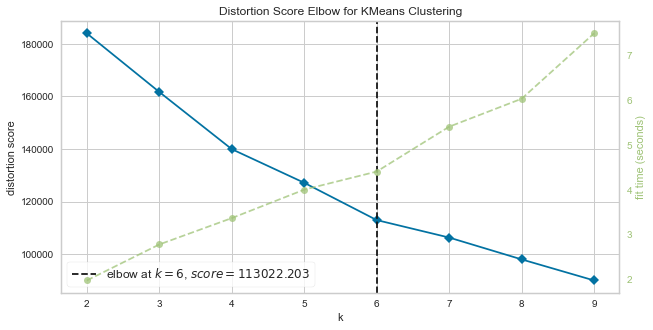

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
df_pca_scaled_filt = df_pca_scaled
df_f_kmeans = df_pca_scaled_filt.copy()

kmeans = KMeans(init='k-means++',random_state = 66)
plt.figure(figsize=[10,5])
elb_visualizer = KElbowVisualizer(kmeans, k=(2,10))
elb_visualizer.fit(df_f_kmeans)
elb_visualizer.show()

In [23]:
df_f_kmeans_sample = df_f_kmeans.sample(frac=0.2, random_state=66)
df_f_kmeans_sample.shape

(135216, 10)

In [24]:
k_cluster = [5,6]
silhouette_list = []

for k in k_cluster:
    cluster_labels = KMeans(n_clusters=k, random_state = 66).fit_predict(df_f_kmeans_sample)
    sil = silhouette_score(df_f_kmeans_sample,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+str(sil))

silhouette for 5 calculated: 0.27586118694415807
silhouette for 6 calculated: 0.2944607717981008


No logramos obtener un buen resultado de silueta usando PCA por lo que consideramos buscar combinacion de las variables origianles del dataset

### Metricas principales de grafos + Points + Categoricas

In [27]:
cols_filt    = ['pagerank_cent_followers',#'in_degree_followers', 'out_degree_followers','in_degree_cent_followers',
                'eigenvector_cent_teams',#'degree_teams', 'degree_cent_teams',
                'eigenvector_cent_participant',#'degree_participant', 'degree_cent_participant',
                'eigenvector_cent_forums',#'degree_forums', 'degree_cent_forums',
                #'Points_Comp', 'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp',
                #'Points_Scri', #TotalGold_Scri', 'TotalSilver_Scri', 'TotalBronze_Scri',
                #'Points_Disc', 'TotalGold_Disc', 'TotalSilver_Disc', 'TotalBronze_Disc',
                #'Points_Data', 'TotalGold_Data', 'TotalSilver_Data', 'TotalBronze_Data',
                #'PerformanceTier_Cat_Expert', 'PerformanceTier_Cat_Grandmaster', 'PerformanceTier_Cat_Master', 'PerformanceTier_Cat_Novice',
                'Seniority_Cat_0_05', 'Seniority_Cat_1_2', 'Seniority_Cat_2_3', 'Seniority_Cat_3_4', 'Seniority_Cat_4_mas',
                'Flg_IsIn_Followers_Net_Si','Flg_IsIn_Teams_Net_Si', 'Flg_IsIn_ParticipantComp_Net_Si','Flg_IsIn_Forums_Net_Si',
                'Datasets','comentarios','ratio_comentarios_premiados','competencias','competencias_premiadas','ratio_competencias_premiadas'
                ]

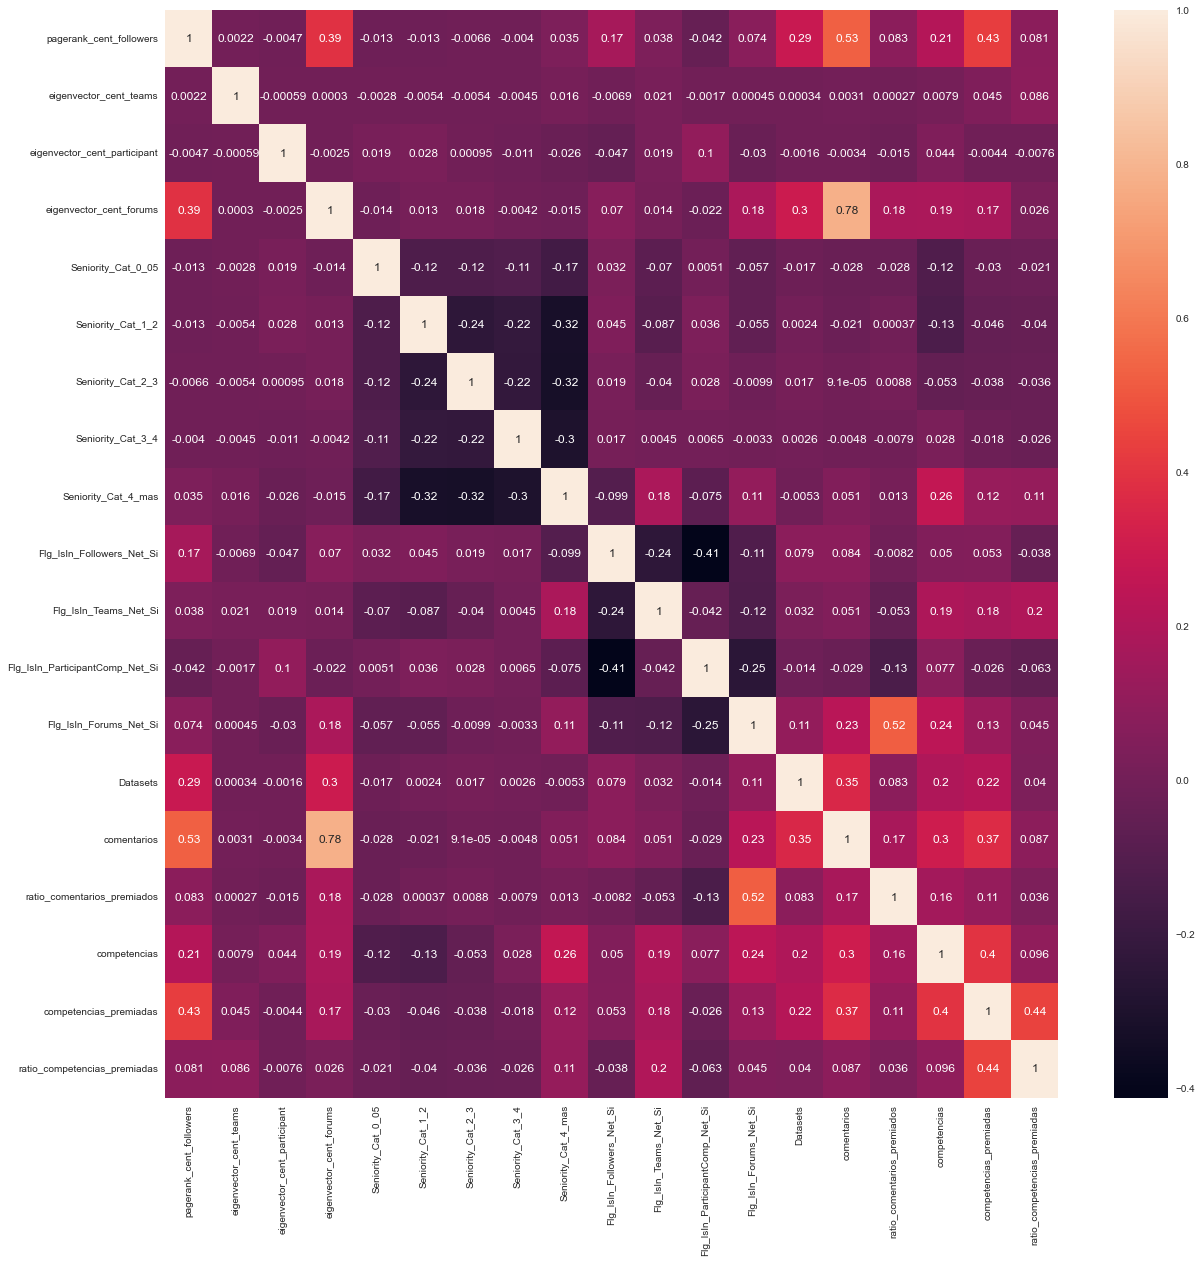

In [28]:
df_f_kmeans = df[cols_filt].copy()

corrMatrix = df_f_kmeans.corr()
plt.figure(figsize=[20,20])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [29]:
df_f_kmeans = df[cols_filt].copy()

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=66)
    kmeanModel.fit(df_f_kmeans)
    inertias.append(kmeanModel.inertia_)

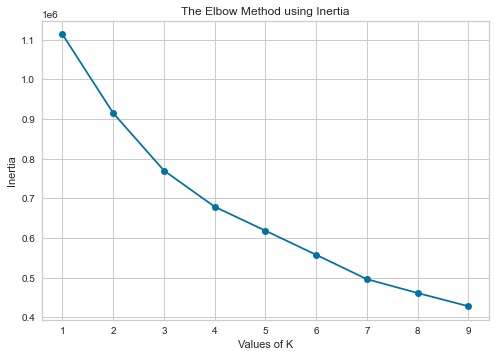

In [30]:
plt.plot(K, inertias, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [31]:
df_f_kmeans_sample = df_f_kmeans.sample(frac=0.2, random_state=66)
df_f_kmeans_sample.shape

(135216, 19)

In [32]:
k_cluster = [4,5,6]
silhouette_list = []

for k in k_cluster:
    cluster_labels = KMeans(n_clusters=k, random_state = 66).fit_predict(df_f_kmeans_sample)
    sil = silhouette_score(df_f_kmeans_sample,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+str(sil))

silhouette for 4 calculated: 0.2709130163993849
silhouette for 5 calculated: 0.28687442616604614
silhouette for 6 calculated: 0.2981022905624103


El resultado para la silueta no es el esperado usando casi todas las columnas del dataset original por lo cual probaremos otra combinacion de variables

### Evaluacion con dataset original, solo con metricas de las redes + Performance Tier + Seniority Months

In [62]:
cols_filt    = ['pagerank_cent_followers',#'in_degree_followers', 'out_degree_followers','in_degree_cent_followers',
                'eigenvector_cent_teams',#'degree_teams', 'degree_cent_teams',
                'eigenvector_cent_participant',#'degree_participant', 'degree_cent_participant',
                'eigenvector_cent_forums',#'degree_forums', 'degree_cent_forums',
                #'Points_Comp', 'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp',
                #'Points_Scri', #TotalGold_Scri', 'TotalSilver_Scri', 'TotalBronze_Scri',
                #'Points_Disc', 'TotalGold_Disc', 'TotalSilver_Disc', 'TotalBronze_Disc',
                #'Points_Data', 'TotalGold_Data', 'TotalSilver_Data', 'TotalBronze_Data',
                #'PerformanceTier_Cat_Expert', 'PerformanceTier_Cat_Grandmaster', 'PerformanceTier_Cat_Master', 'PerformanceTier_Cat_Novice',
                #'Seniority_Cat_0_05', 'Seniority_Cat_1_2', 'Seniority_Cat_2_3', 'Seniority_Cat_3_4', 'Seniority_Cat_4_mas',
                #'Flg_IsIn_Followers_Net_Si','Flg_IsIn_Teams_Net_Si', 'Flg_IsIn_ParticipantComp_Net_Si','Flg_IsIn_Forums_Net_Si',
                'Datasets','comentarios','ratio_comentarios_premiados','competencias','competencias_premiadas','ratio_competencias_premiadas'
                ]

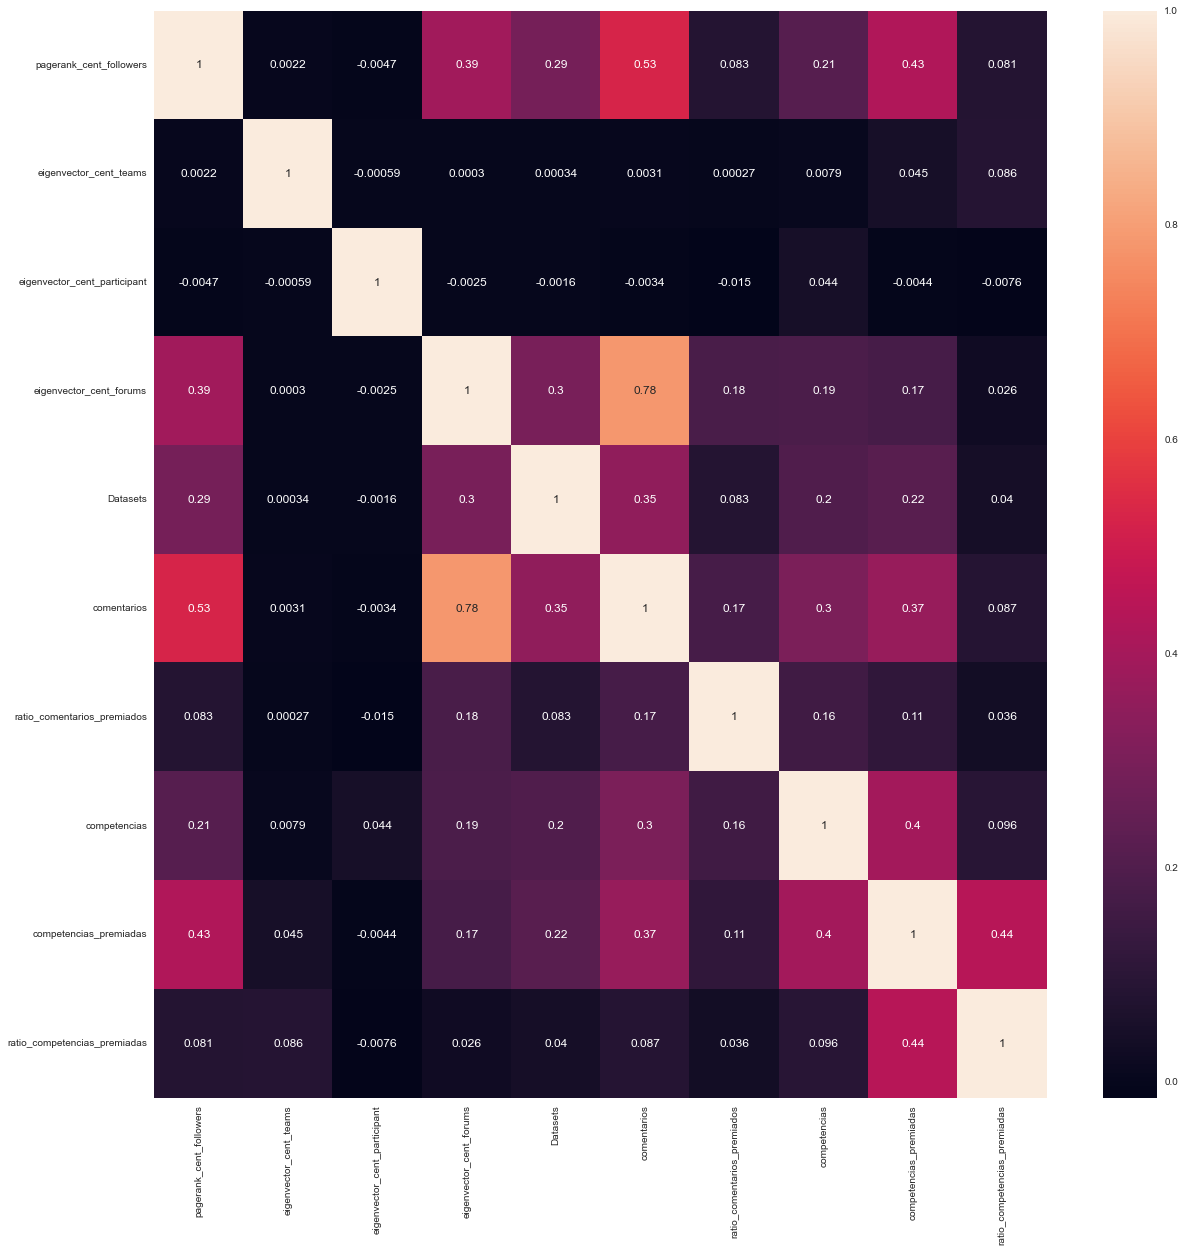

In [63]:
df_f_kmeans = df[cols_filt].copy()

corrMatrix = df_f_kmeans.corr()
plt.figure(figsize=[20,20])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [34]:
df_f_kmeans = df[cols_filt].copy()

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=66)
    kmeanModel.fit(df_f_kmeans)
    inertias.append(kmeanModel.inertia_)

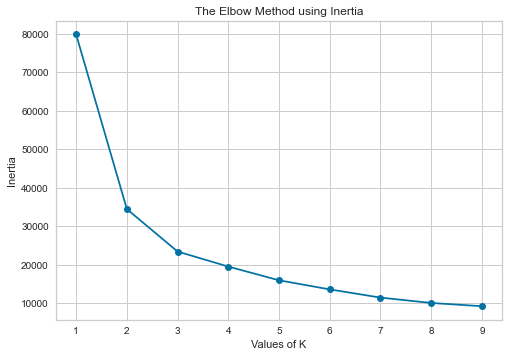

In [35]:
plt.plot(K, inertias, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [36]:
df_f_kmeans_sample = df_f_kmeans.sample(frac=0.2, random_state=66)
df_f_kmeans_sample.shape

(135216, 10)

In [37]:
k_cluster = [3,4]
silhouette_list = []

for k in k_cluster:
    cluster_labels = KMeans(n_clusters=k, random_state = 66).fit_predict(df_f_kmeans_sample)
    sil = silhouette_score(df_f_kmeans_sample,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+str(sil))

silhouette for 3 calculated: 0.7780132178343495
silhouette for 4 calculated: 0.752930025980132


En esta oportunidad obtenemos valores de silueta esperados (> 0.8) por lo que consideramos esta combinacion de variable como optima, sin embargo evaluaremos una ultima combinacion

### Evaluacion con dataset original, solo con metricas de las redes + Performance Tier

In [38]:
cols_filt    = ['pagerank_cent_followers',#'in_degree_followers', 'out_degree_followers','in_degree_cent_followers',
                'eigenvector_cent_teams',#'degree_teams', 'degree_cent_teams',
                'eigenvector_cent_participant',#'degree_participant', 'degree_cent_participant',
                'eigenvector_cent_forums',#'degree_forums', 'degree_cent_forums',
                #'Points_Comp', 'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp',
                #'Points_Scri', #TotalGold_Scri', 'TotalSilver_Scri', 'TotalBronze_Scri',
                #'Points_Disc', 'TotalGold_Disc', 'TotalSilver_Disc', 'TotalBronze_Disc',
                #'Points_Data', 'TotalGold_Data', 'TotalSilver_Data', 'TotalBronze_Data',
                #'PerformanceTier_Cat_Expert', 'PerformanceTier_Cat_Grandmaster', 'PerformanceTier_Cat_Master', 'PerformanceTier_Cat_Novice',
                #'Seniority_Cat_0_05', 'Seniority_Cat_1_2', 'Seniority_Cat_2_3', 'Seniority_Cat_3_4', 'Seniority_Cat_4_mas',
                'Flg_IsIn_Followers_Net_Si','Flg_IsIn_Teams_Net_Si', 'Flg_IsIn_ParticipantComp_Net_Si','Flg_IsIn_Forums_Net_Si',
                'Datasets','comentarios','ratio_comentarios_premiados','competencias','competencias_premiadas','ratio_competencias_premiadas'
                ]

In [39]:
df_f_kmeans = df[cols_filt].copy()

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=66)
    kmeanModel.fit(df_f_kmeans)
    inertias.append(kmeanModel.inertia_)

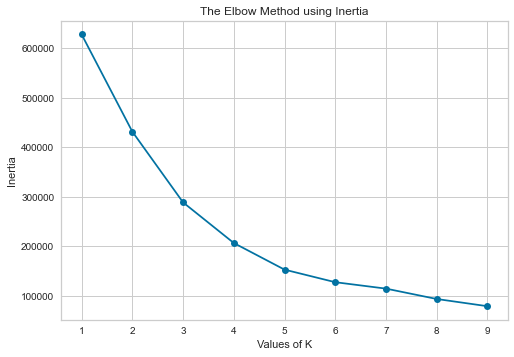

In [40]:
plt.plot(K, inertias, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [41]:
df_f_kmeans_sample = df_f_kmeans.sample(frac=0.2, random_state=66)
df_f_kmeans_sample.shape

(135216, 14)

In [43]:
k_cluster = [3,4,5]
silhouette_list = []

for k in k_cluster:
    cluster_labels = KMeans(n_clusters=k, random_state = 66).fit_predict(df_f_kmeans_sample)
    sil = silhouette_score(df_f_kmeans_sample,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+str(sil))

silhouette for 3 calculated: 0.5192056856032913
silhouette for 4 calculated: 0.6051403248045245
silhouette for 5 calculated: 0.65739600283553


No se obtienen los resultados esperados agregando las nuevas varibales x lo que nos quedamos con la combinacion previa de solo metricas de los grafos

# K-Means - Modeling

In [44]:
cols_filt    = ['pagerank_cent_followers',#'in_degree_followers', 'out_degree_followers','in_degree_cent_followers',
                'eigenvector_cent_teams',#'degree_teams', 'degree_cent_teams',
                'eigenvector_cent_participant',#'degree_participant', 'degree_cent_participant',
                'eigenvector_cent_forums',#'degree_forums', 'degree_cent_forums',
                #'Points_Comp', 'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp',
                #'Points_Scri', #TotalGold_Scri', 'TotalSilver_Scri', 'TotalBronze_Scri',
                #'Points_Disc', 'TotalGold_Disc', 'TotalSilver_Disc', 'TotalBronze_Disc',
                #'Points_Data', 'TotalGold_Data', 'TotalSilver_Data', 'TotalBronze_Data',
                #'PerformanceTier_Cat_Expert', 'PerformanceTier_Cat_Grandmaster', 'PerformanceTier_Cat_Master', 'PerformanceTier_Cat_Novice',
                #'Seniority_Cat_0_05', 'Seniority_Cat_1_2', 'Seniority_Cat_2_3', 'Seniority_Cat_3_4', 'Seniority_Cat_4_mas',
                #'Flg_IsIn_Followers_Net_Si','Flg_IsIn_Teams_Net_Si', 'Flg_IsIn_ParticipantComp_Net_Si','Flg_IsIn_Forums_Net_Si',
                'Datasets','comentarios','ratio_comentarios_premiados','competencias','competencias_premiadas','ratio_competencias_premiadas'
                ]

In [45]:
df_f_kmeans_sample = df_f_kmeans.sample(frac=0.2, random_state=66)
df_f_kmeans_sample.shape

(135216, 14)

In [46]:
kmeans = KMeans(n_clusters=3, random_state = 66)
cluster_labels = kmeans.fit_predict(df_f_kmeans)
df_f_kmeans_2 = df[cols_filt].copy()
df_f_kmeans_2["Cluster"] = cluster_labels
df_f_kmeans_2["Cluster"] = df_f_kmeans_2["Cluster"].astype(str)

In [47]:
#Guardamos el K-Means
filename = r'../models/kmeans_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

In [48]:
df_f_kmeans_2["Cluster"].value_counts()

1    265459
2    208348
0    202275
Name: Cluster, dtype: int64

In [49]:
distances = pairwise_distances(df_f_kmeans, kmeans.cluster_centers_, metric='euclidean')

In [50]:
df_distances = pd.DataFrame(distances,columns=["C0","C1","C2"])
df_distances.head()

,C0,C1,C2
0,2.415723,2.258360,1.993634
1,1.840578,1.735727,1.466842
2,1.630415,1.955153,1.196270
3,1.671980,1.431418,1.097865
4,1.960082,1.512287,1.149275


In [51]:
df_f_kmeans_3 = df_f_kmeans_2.copy()

df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "0", 'Distance')] = df_distances["C0"]
df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "1", 'Distance')] = df_distances["C1"]
df_f_kmeans_3.loc[(df_f_kmeans_3['Cluster'] == "2", 'Distance')] = df_distances["C2"]

In [52]:
df_f_kmeans_3.head()

,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_participant,eigenvector_cent_forums,Datasets,comentarios,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,Cluster,Distance
0,1.000000,1.224451e-23,0.000000,0.187723,0.542222,1.000000,0.267016,1.000000,0.00000,0.0,2,1.993634
1,0.015561,0.000000e+00,0.003026,0.008970,0.000000,1.000000,0.205323,0.268406,0.00000,0.0,2,1.466842
2,0.000000,1.224451e-23,0.000000,0.000303,0.000000,0.005326,1.000000,0.029823,0.00000,0.0,2,1.196270
3,0.006400,1.517660e-24,0.000000,0.005130,0.000000,0.063910,0.083333,0.506989,0.00000,0.0,2,1.097865
4,0.006203,0.000000e+00,0.000000,0.000198,0.000000,0.021303,0.500000,0.298229,0.59072,0.8,2,1.149275


In [53]:
df_f_kmeans_3['Distance_Rank'] = df_f_kmeans_3.groupby('Cluster')['Distance'].rank(ascending=False,method='min')
df_f_kmeans_3.head()

,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_participant,eigenvector_cent_forums,Datasets,comentarios,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,Cluster,Distance,Distance_Rank
0,1.000000,1.224451e-23,0.000000,0.187723,0.542222,1.000000,0.267016,1.000000,0.00000,0.0,2,1.993634,508.0
1,0.015561,0.000000e+00,0.003026,0.008970,0.000000,1.000000,0.205323,0.268406,0.00000,0.0,2,1.466842,4726.0
2,0.000000,1.224451e-23,0.000000,0.000303,0.000000,0.005326,1.000000,0.029823,0.00000,0.0,2,1.196270,16894.0
3,0.006400,1.517660e-24,0.000000,0.005130,0.000000,0.063910,0.083333,0.506989,0.00000,0.0,2,1.097865,26658.0
4,0.006203,0.000000e+00,0.000000,0.000198,0.000000,0.021303,0.500000,0.298229,0.59072,0.8,2,1.149275,20048.0


In [54]:
df_f_kmeans_3[df_f_kmeans_3["Cluster"]=="1"].sort_values(["Distance_Rank"]).head(10)

,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_participant,eigenvector_cent_forums,Datasets,comentarios,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,Cluster,Distance,Distance_Rank
297351,1.000000,1.210238e-16,0.000000,0.0,0.000000,0.005326,1.0,0.62628,0.443040,0.285714,1,1.844157,1.0
150215,0.022156,1.445697e-22,0.000000,0.0,0.154921,0.005326,1.0,1.00000,0.369200,0.064935,1,1.692991,2.0
122691,0.009043,0.000000e+00,1.000000,0.0,0.206561,0.000000,0.0,1.00000,0.000000,0.000000,1,1.689796,3.0
11962,0.005460,3.358258e-06,0.000000,0.0,0.000000,0.000000,0.0,1.00000,1.000000,0.369565,1,1.689100,4.0
271136,0.041623,1.226534e-04,0.000000,0.0,0.361482,0.000000,0.0,1.00000,0.959919,0.216667,1,1.678207,5.0
333562,0.014670,0.000000e+00,0.005731,0.0,0.000000,0.005326,1.0,1.00000,0.000000,0.000000,1,1.671964,6.0
139236,0.009195,0.000000e+00,0.006021,0.0,0.000000,0.005326,1.0,1.00000,0.000000,0.000000,1,1.671950,7.0
212542,0.004708,0.000000e+00,0.002669,0.0,0.000000,0.005326,1.0,1.00000,0.000000,0.000000,1,1.671943,8.0
491057,0.008273,0.000000e+00,0.000097,0.0,0.000000,0.005326,1.0,1.00000,0.000000,0.000000,1,1.671939,9.0
210826,0.216489,7.553737e-05,0.000000,0.0,0.000000,0.000000,0.0,1.00000,1.000000,0.181818,1,1.671728,10.0


# Perfilamiento de clusters

In [55]:
df_pre = pd.read_csv(r"../data/processed/UserPreProcessed_Net.csv")
df_pre.head()

,UserId,UserName,PerformanceTier_Cat,Seniority_Cat,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_participant,degree_cent_participant,eigenvector_cent_participant,degree_forums,degree_cent_forums,eigenvector_cent_forums,Points_Comp,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,Points_Scri,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,Points_Disc,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,Points_Data,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Datasets,comentarios,comentarios_premiados,ratio_comentarios_premiados,competencias,competencias_premiadas,ratio_competencias_premiadas,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_ParticipantComp_Net,Flg_IsIn_Forums_Net,Flg_IsIn_SomeNet
0,368,antgoldbloom,Expert,4_mas,983.0,6.0,0.002690,0.001607,4.0,0.000026,9.451808e-26,0.0,0.000000,0.000000,1320.0,0.006309,0.001260,232.0,0.0,0.0,0.0,41.0,0.0,3.0,13.0,218.0,14.0,13.0,139.0,79.0,1.0,3.0,6.0,21.0,573.0,153.0,0.267016,98.0,0.0,0.0,Si,Si,No,Si,Si
1,381,iguyon,Expert,4_mas,6.0,0.0,0.000016,0.000003,0.0,0.000000,0.000000e+00,163.0,0.001037,0.000024,164.0,0.000784,0.000060,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,0.0,0.0,263.0,54.0,0.205323,9.0,0.0,0.0,Si,No,Si,Si,Si
2,387,nicholasgruen,Novice,4_mas,0.0,0.0,0.000000,0.000000,4.0,0.000026,9.451808e-26,0.0,0.000000,0.000000,18.0,0.000086,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,0.0,0.0,No,Si,No,Si,Si
3,389,anandjeyahar,Contributor,4_mas,2.0,0.0,0.000005,0.000001,1.0,0.000006,1.171515e-26,0.0,0.000000,0.000000,100.0,0.000478,0.000034,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.083333,17.0,0.0,0.0,Si,Si,No,Si,Si
4,392,jmeynet,Master,4_mas,1.0,0.0,0.000003,0.000001,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000,27.0,0.000129,0.000001,94.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.500000,10.0,8.0,0.8,Si,No,No,Si,Si


In [56]:
df_per = df_pre.copy()
df_per["Cluster"] = df_f_kmeans_3["Cluster"]
df_per["Distance"] = df_f_kmeans_3["Distance"]
df_per["Distance_Rank"] = df_f_kmeans_3["Distance_Rank"]

In [58]:
df_per_c0 = df_per[df_per["Cluster"]=="0"]
df_per_c1 = df_per[df_per["Cluster"]=="1"]
df_per_c2 = df_per[df_per["Cluster"]=="2"]

In [59]:
df_per.columns

Index(['UserId', 'UserName', 'PerformanceTier_Cat', 'Seniority_Cat',
       'in_degree_followers', 'out_degree_followers',
       'in_degree_cent_followers', 'pagerank_cent_followers', 'degree_teams',
       'degree_cent_teams', 'eigenvector_cent_teams', 'degree_participant',
       'degree_cent_participant', 'eigenvector_cent_participant',
       'degree_forums', 'degree_cent_forums', 'eigenvector_cent_forums',
       'Points_Comp', 'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp',
       'Points_Scri', 'TotalGold_Scri', 'TotalSilver_Scri', 'TotalBronze_Scri',
       'Points_Disc', 'TotalGold_Disc', 'TotalSilver_Disc', 'TotalBronze_Disc',
       'Points_Data', 'TotalGold_Data', 'TotalSilver_Data', 'TotalBronze_Data',
       'Datasets', 'comentarios', 'comentarios_premiados',
       'ratio_comentarios_premiados', 'competencias', 'competencias_premiadas',
       'ratio_competencias_premiadas', 'Flg_IsIn_Followers_Net',
       'Flg_IsIn_Teams_Net', 'Flg_IsIn_ParticipantComp_Net',

In [60]:
numerics = ['int64','float64']

cols_num = df_per.select_dtypes(include=numerics).columns
cols_cat = df_per.select_dtypes(exclude=numerics).columns

print(cols_num)
print(cols_cat)

Index(['UserId', 'in_degree_followers', 'out_degree_followers',
       'in_degree_cent_followers', 'pagerank_cent_followers', 'degree_teams',
       'degree_cent_teams', 'eigenvector_cent_teams', 'degree_participant',
       'degree_cent_participant', 'eigenvector_cent_participant',
       'degree_forums', 'degree_cent_forums', 'eigenvector_cent_forums',
       'Points_Comp', 'TotalGold_Comp', 'TotalSilver_Comp', 'TotalBronze_Comp',
       'Points_Scri', 'TotalGold_Scri', 'TotalSilver_Scri', 'TotalBronze_Scri',
       'Points_Disc', 'TotalGold_Disc', 'TotalSilver_Disc', 'TotalBronze_Disc',
       'Points_Data', 'TotalGold_Data', 'TotalSilver_Data', 'TotalBronze_Data',
       'Datasets', 'comentarios', 'comentarios_premiados',
       'ratio_comentarios_premiados', 'competencias', 'competencias_premiadas',
       'ratio_competencias_premiadas', 'Distance', 'Distance_Rank'],
      dtype='object')
Index(['UserName', 'PerformanceTier_Cat', 'Seniority_Cat',
       'Flg_IsIn_Followers_Net', '

In [64]:
# Analisis de las variables categoricas
cols_used = ['pagerank_cent_followers','eigenvector_cent_teams','eigenvector_cent_participant','eigenvector_cent_forums',
             'Datasets','comentarios','ratio_comentarios_premiados','competencias','competencias_premiadas','ratio_competencias_premiadas'
             ]

df_export = df_per.groupby(["Cluster"])[cols_used].describe().T
df_export

Cluster                                        0             1              2
pagerank_cent_followers      count  2.022750e+05  2.654590e+05  208348.000000
                             mean   4.568693e-08  1.428476e-06       0.000003
                             std    5.649305e-07  3.107675e-06       0.000083
                             min    0.000000e+00  8.988900e-07       0.000000
                             25%    0.000000e+00  8.988900e-07       0.000000
...                                          ...           ...            ...
ratio_competencias_premiadas min    0.000000e+00  0.000000e+00       0.000000
                             25%    0.000000e+00  0.000000e+00       0.000000
                             50%    0.000000e+00  0.000000e+00       0.000000
                             75%    0.000000e+00  0.000000e+00       0.000000
                             max    1.000000e+00  1.000000e+00       1.000000

[80 rows x 3 columns]

In [65]:
df_export.to_excel(r"../data/processed/perfilamiento.xlsx")

In [47]:
pd.crosstab(df_per.Cluster,df_per.Flg_IsIn_Followers_Net,normalize='index')

Flg_IsIn_Followers_Net,No,Si
Cluster,,
0,0.000000,1.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.730061,0.269939
4,0.000000,1.000000


In [48]:
pd.crosstab(df_per.Cluster,df_per.Flg_IsIn_Teams_Net,normalize='index')

Flg_IsIn_Teams_Net,No,Si
Cluster,,
0,1.000000,0.000000
1,0.921080,0.078920
2,0.837223,0.162777
3,0.000000,1.000000
4,0.773861,0.226139


In [49]:
pd.crosstab(df_per.Cluster,df_per.Flg_IsIn_ParticipantComp_Net,normalize='index')

Flg_IsIn_ParticipantComp_Net,No,Si
Cluster,,
0,0.958045,0.041955
1,1.000000,0.000000
2,0.000000,1.000000
3,0.952305,0.047695
4,0.897487,0.102513


In [50]:
pd.crosstab(df_per.Cluster,df_per.Flg_IsIn_Forums_Net,normalize='index')

Flg_IsIn_Forums_Net,No,Si
Cluster,,
0,1.000000,0.000000
1,0.000000,1.000000
2,0.958722,0.041278
3,1.000000,0.000000
4,0.000000,1.000000


In [48]:
Validator.validar_numerico(df_per,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Zero,%Zero,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,UserId,10087383,0,0.000000,0,0.0,0,0.000000,10087383,5.482140e+06,368.000000,1.094698e+07,1.644821e+07,1.493402e+07,1.128414e+06,2.745080e+06,5.488431e+06,8.226332e+06,9.864483e+06,1.040505e+07,1.083926e+07,0,0.000000,0,0.000000,1008739,10.000007,504370,5.000008,100874,1.000002
0,in_degree_followers,10087383,0,0.000000,0,0.0,9933915,98.478614,543,9.198798e-02,0.000000,1.684000e+04,0.000000e+00,4.183153e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,153468,1.521386,1968,0.019510,153468,1.521386,153468,1.521386,51924,0.514742
0,out_degree_followers,10087383,0,0.000000,0,0.0,9786709,97.019306,268,9.188230e-02,0.000000,3.310000e+03,0.000000e+00,6.688990e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,300674,2.980694,24318,0.241073,300674,2.980694,300674,2.980694,71349,0.707309
0,in_degree_cent_followers,10087383,0,0.000000,0,0.0,9933915,98.478614,543,2.516826e-07,0.000000,4.607488e-02,0.000000e+00,1.144527e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.736038e-06,153468,1.521386,1968,0.019510,153468,1.521386,153468,1.521386,51924,0.514742
0,pagerank_cent_followers,10087383,0,0.000000,0,0.0,9721922,96.377048,51511,9.913089e-08,0.000000,2.708930e-02,0.000000e+00,3.595282e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500212e-06,365461,3.622952,1627,0.016129,365461,3.622952,365461,3.622952,100874,1.000002
0,degree_teams,10087383,0,0.000000,0,0.0,9935822,98.497519,71,3.781913e-02,0.000000,1.330000e+02,0.000000e+00,1.384487e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,151561,1.502481,92946,0.921408,151561,1.502481,151561,1.502481,92946,0.921408
0,degree_cent_teams,10087383,0,0.000000,0,0.0,9935822,98.497519,71,2.428522e-07,0.000000,8.540477e-04,0.000000e+00,8.890358e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.421412e-06,151561,1.502481,92946,0.921408,151561,1.502481,151561,1.502481,92946,0.921408
0,eigenvector_cent_teams,10087383,0,0.000000,0,0.0,9935822,98.497519,24945,2.001782e-07,0.000000,7.050741e-01,0.000000e+00,9.447654e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.746950e-31,151561,1.502481,97,0.000962,151561,1.502481,151561,1.502481,76090,0.754309
0,degree_participant,10087383,0,0.000000,0,0.0,9934133,98.480775,866,1.943037e+00,0.000000,4.465500e+04,0.000000e+00,8.206208e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,153250,1.519225,93999,0.931847,153250,1.519225,153250,1.519225,100048,0.991813
0,degree_cent_participant,10087383,0,0.000000,0,0.0,9934133,98.480775,866,1.236367e-05,0.000000,2.841426e-01,0.000000e+00,5.221662e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.708667e-04,153250,1.519225,93999,0.931847,153250,1.519225,153250,1.519225,100048,0.991813


: 

In [85]:
Validator.validar_numerico(df_per_c0,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,17091,0,0.0,0,0.0,4,1.46,1.0,4.00,3.5,3.62,1.0,1.0,1.0,2.0,2.0,3.0,4.00,309,1.81,309,1.81,1700,9.95,309,1.81,0,0.00
0,pagerank_cent_followers,17091,0,0.0,0,0.0,10353,0.00,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2464,14.42,69,0.40,1709,10.00,855,5.00,171,1.00
0,eigenvector_cent_teams,17091,0,0.0,0,0.0,4027,0.00,0.0,0.20,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4145,24.25,6,0.04,1709,10.00,855,5.00,171,1.00
0,eigenvector_cent_forums,17091,0,0.0,0,0.0,15360,0.00,0.0,0.38,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.01,2305,13.49,104,0.61,1709,10.00,855,5.00,171,1.00
0,in_degree_followers,17091,0,0.0,0,0.0,472,30.10,0.0,16840.00,13.5,966.16,0.0,1.0,2.0,6.0,26.0,62.0,478.30,2645,15.48,82,0.48,1667,9.75,848,4.96,171,1.00
0,out_degree_followers,17091,0,0.0,0,0.0,193,7.88,0.0,2136.00,16.0,90.15,0.0,1.0,2.0,7.0,18.0,31.0,82.00,1834,10.73,149,0.87,1626,9.51,838,4.90,170,0.99
0,degree_teams,17091,0,0.0,0,0.0,68,3.99,1.0,133.00,8.5,20.38,1.0,1.0,2.0,4.0,8.0,12.0,27.00,1593,9.32,335,1.96,1593,9.32,833,4.87,170,0.99
0,degree_forums,17091,0,0.0,0,0.0,1279,161.30,2.0,15622.00,348.5,1323.15,5.0,16.0,51.0,149.0,376.0,698.0,1678.20,1840,10.77,269,1.57,1708,9.99,854,5.00,171,1.00
0,Flg_IsIn_Followers_Net,17091,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,17091,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [86]:
Validator.validar_numerico(df_per_c1,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,58866,0,0.0,0,0.0,3,1.01,1.0,3.0,1.0,1.31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,522,0.89,522,0.89,522,0.89,522,0.89,522,0.89
0,pagerank_cent_followers,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_teams,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_forums,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,in_degree_followers,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,out_degree_followers,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_teams,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_forums,58866,58866,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Followers_Net,58866,0,0.0,0,0.0,1,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,58866,0,0.0,0,0.0,1,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [87]:
Validator.validar_numerico(df_per_c2,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,35723,0,0.0,0,0.0,3,1.02,1.0,3.00,1.0,1.46,1.0,1.0,1.0,1.0,1.0,1.0,2.00,665,1.86,665,1.86,665,1.86,665,1.86,41,0.11
0,pagerank_cent_followers,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_teams,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_forums,35723,0,0.0,0,0.0,20539,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2781,7.78,548,1.53,3570,9.99,1787,5.00,358,1.00
0,in_degree_followers,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,out_degree_followers,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_teams,35723,35723,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_forums,35723,0,0.0,0,0.0,383,46.07,2.0,1261.00,143.0,220.33,3.0,8.0,23.0,62.0,127.0,181.0,229.78,2868,8.03,473,1.32,3522,9.86,1771,4.96,358,1.00
0,Flg_IsIn_Followers_Net,35723,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,35723,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [88]:
Validator.validar_numerico(df_per_c3,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,42806,0,0.0,0,0.0,4,1.11,1.0,4.00,1.0,2.13,1.0,1.0,1.0,1.0,1.0,2.00,2.00,4082,9.54,390,0.91,4082,9.54,390,0.91,390,0.91
0,pagerank_cent_followers,42806,0,0.0,0,0.0,14286,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5619,13.13,99,0.23,4281,10.00,2141,5.00,429,1.00
0,eigenvector_cent_teams,42806,42806,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_forums,42806,0,0.0,0,0.0,32211,0.00,0.0,0.25,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.01,4952,11.57,240,0.56,4281,10.00,2141,5.00,429,1.00
0,in_degree_followers,42806,0,0.0,0,0.0,268,5.16,0.0,9026.00,5.0,243.01,0.0,0.0,1.0,2.0,7.0,15.00,64.00,5113,11.94,82,0.19,3943,9.21,2032,4.75,428,1.00
0,out_degree_followers,42806,0,0.0,0,0.0,193,5.43,0.0,2756.00,11.0,68.08,0.0,1.0,2.0,5.0,12.0,21.00,54.00,4540,10.61,290,0.68,4093,9.56,1993,4.66,427,1.00
0,degree_teams,42806,42806,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_forums,42806,0,0.0,0,0.0,1202,92.88,2.0,6580.00,231.0,718.54,4.0,11.0,34.0,99.0,206.0,327.75,968.00,3437,8.03,706,1.65,4232,9.89,2141,5.00,428,1.00
0,Flg_IsIn_Followers_Net,42806,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,42806,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [89]:
Validator.validar_numerico(df_per_c4,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,5664,0,0.0,0,0.0,3,1.13,1.0,3.00,1.0,2.20,1.0,1.0,1.0,1.0,2.0,2.00,2.00,665,11.74,52,0.92,52,0.92,52,0.92,52,0.92
0,pagerank_cent_followers,5664,5664,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_teams,5664,0,0.0,0,0.0,714,0.00,0.0,0.23,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1293,22.83,8,0.14,567,10.01,284,5.01,57,1.01
0,eigenvector_cent_forums,5664,0,0.0,0,0.0,4903,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,654,11.55,76,1.34,567,10.01,284,5.01,57,1.01
0,in_degree_followers,5664,5664,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,out_degree_followers,5664,5664,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_teams,5664,0,0.0,0,0.0,35,2.67,1.0,65.00,6.0,11.78,1.0,1.0,2.0,3.0,5.0,7.00,13.00,302,5.33,72,1.27,442,7.80,203,3.58,48,0.85
0,degree_forums,5664,0,0.0,0,0.0,264,41.54,2.0,867.00,119.5,211.42,3.0,7.0,19.0,52.0,113.0,163.85,242.37,511,9.02,99,1.75,566,9.99,284,5.01,57,1.01
0,Flg_IsIn_Followers_Net,5664,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,5664,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [90]:
df_per_c4[~df_per_c4["degree_forums"].isna()]

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Cluster,Distance,Distance_Rank,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
74,763,sdvillal,Santi,2,9Y,NaN,NaN,NaN,NaN,1.0,0.000006,3.204790e-18,24.0,0.000237,4.872875e-06,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.291188,344.0,0.0,1.0,1.0
87,792,rfeather,Ryan Feather,2,9Y,NaN,NaN,NaN,NaN,1.0,0.000006,3.204790e-18,131.0,0.001293,3.633373e-05,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4,0.291143,632.0,0.0,1.0,1.0
88,798,vivekvichare,V3,1,9Y,NaN,NaN,NaN,NaN,5.0,0.000032,1.477620e-07,63.0,0.000622,9.760278e-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.042466,3832.0,0.0,1.0,1.0
113,882,jstreet,Jonathan Street,1,9Y,NaN,NaN,NaN,NaN,1.0,0.000006,5.427340e-23,91.0,0.000898,1.247109e-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4,0.042428,4046.0,0.0,1.0,1.0
184,1188,edmund0,Edmund,1,9Y,NaN,NaN,NaN,NaN,1.0,0.000006,5.427340e-23,3.0,0.000030,1.503780e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4,0.042634,1727.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193582,10567946,hongzerush,Hongze Rush,1,1Y,NaN,NaN,NaN,NaN,3.0,0.000019,3.043756e-13,124.0,0.001224,5.214408e-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.042266,5085.0,0.0,1.0,1.0
193627,10596068,richelieu1,Richelieu1,1,1Y,NaN,NaN,NaN,NaN,4.0,0.000026,6.790301e-09,6.0,0.000059,4.172171e-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.042234,5595.0,0.0,1.0,1.0
193770,10670095,dongyiqidolicy,Dongyiqi_Dolicy,1,1Y,NaN,NaN,NaN,NaN,3.0,0.000019,1.092585e-10,118.0,0.001165,1.954506e-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.047739,854.0,0.0,1.0,1.0
193825,10699484,machineforgetting,RS7,1,1Y,NaN,NaN,NaN,NaN,3.0,0.000019,2.091866e-11,35.0,0.000346,3.980357e-05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.042234,5604.0,0.0,1.0,1.0


In [91]:
#Contribuidor de foro antiguo y competidor
Validator.validar_numerico(df_per_c5,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,21896,0,0.00,0,0.0,4,1.06,1.0,4.00,1.0,1.86,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1181,5.39,1181,5.39,1181,5.39,151,0.69,151,0.69
0,pagerank_cent_followers,21896,0,0.00,0,0.0,5402,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2691,12.29,71,0.32,2190,10.00,1095,5.00,219,1.00
0,eigenvector_cent_teams,21896,17640,80.56,0,0.0,764,0.00,0.0,0.19,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,977,4.46,5,0.02,426,1.95,213,0.97,43,0.20
0,eigenvector_cent_forums,21896,21896,100.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,in_degree_followers,21896,0,0.00,0,0.0,65,1.38,0.0,511.00,2.5,19.78,0.0,0.0,1.0,1.0,3.0,5.0,12.0,2686,12.27,102,0.47,1659,7.58,819,3.74,206,0.94
0,out_degree_followers,21896,0,0.00,0,0.0,77,2.41,0.0,281.00,5.0,19.49,0.0,0.0,1.0,2.0,5.0,9.0,22.0,2076,9.48,272,1.24,2076,9.48,927,4.23,212,0.97
0,degree_teams,21896,17640,80.56,0,0.0,30,3.00,1.0,68.00,8.5,12.24,1.0,1.0,2.0,4.0,6.0,8.0,15.0,190,0.87,69,0.32,322,1.47,190,0.87,35,0.16
0,degree_forums,21896,21896,100.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Followers_Net,21896,0,0.00,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,21896,0,0.00,0,0.0,2,0.19,0.0,1.00,0.0,1.38,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4256,19.44,0,0.00,0,0.00,0,0.00,0,0.00


In [92]:
#Contribuidor de foro antiguo y competidor
Validator.validar_numerico(df_per_c6,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,12101,0,0.0,0,0.0,3,1.07,1.0,3.00,1.0,1.90,1.0,1.0,1.0,1.0,1.0,2.0,2.0,725,5.99,725,5.99,725,5.99,88,0.73,88,0.73
0,pagerank_cent_followers,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,eigenvector_cent_teams,12101,0,0.0,0,0.0,849,0.00,0.0,0.19,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2719,22.47,26,0.21,1137,9.40,605,5.00,120,0.99
0,eigenvector_cent_forums,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,in_degree_followers,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,out_degree_followers,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_teams,12101,0,0.0,0,0.0,39,2.82,1.0,50.00,6.0,13.23,1.0,1.0,2.0,3.0,5.0,7.0,17.0,765,6.32,181,1.50,1018,8.41,571,4.72,117,0.97
0,degree_forums,12101,12101,100.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Followers_Net,12101,0,0.0,0,0.0,1,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,Flg_IsIn_Teams_Net,12101,0,0.0,0,0.0,1,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [93]:
df_per.loc[(df_per['Cluster'] == "0", 'Cluster_Name')] = "1. User Gold"
df_per.loc[(df_per['Cluster'] == "3", 'Cluster_Name')] = "2. User Silver"
df_per.loc[(df_per['Cluster'] == "5", 'Cluster_Name')] = "3. Key Team Player"
df_per.loc[(df_per['Cluster'] == "4", 'Cluster_Name')] = "4. Team Player & Forum Participant"
df_per.loc[(df_per['Cluster'] == "6", 'Cluster_Name')] = "5. Team Player"
df_per.loc[(df_per['Cluster'] == "2", 'Cluster_Name')] = "6. Forum Participant"
df_per.loc[(df_per['Cluster'] == "1", 'Cluster_Name')] = "7. Inactive Users"

df_per.loc[(df_per['Cluster'] == "0", 'Cluster_Rank')] = "1"
df_per.loc[(df_per['Cluster'] == "3", 'Cluster_Rank')] = "2"
df_per.loc[(df_per['Cluster'] == "5", 'Cluster_Rank')] = "3"
df_per.loc[(df_per['Cluster'] == "4", 'Cluster_Rank')] = "4"
df_per.loc[(df_per['Cluster'] == "6", 'Cluster_Rank')] = "5"
df_per.loc[(df_per['Cluster'] == "2", 'Cluster_Rank')] = "6"
df_per.loc[(df_per['Cluster'] == "1", 'Cluster_Rank')] = "7"


df_per.to_csv(r"../data/processed/UserCluster2.csv",index=False)